# Segundo entregable. Ampliación de Inteligencia Artificial - Curso 19-20

## Introducción a scikit learn

###  Nombre: Jesús Manuel Sánchez Alanís

### Importante: comentar y explicar adecuadamente cada paso realizado.

#### En este ejercicio, <u>es muy importante el comentar adecuadamente cada paso</u> dado. Los comentarios, que han de ser originales, deberán explicar  todo lo realizado, de manera que se demuestre que se conocen y manejan adecuadamente los conceptos y las herramientas que se usan. Estas explicaciones y comentarios serán parte importante de la nota.

### Plazo de entrega: 6 de junio (1.5 puntos de la nota total)

Se pide aplicar las técnicas vistas en clase a dos conjuntos de datos. Estos datos son:
* Imágenes de dígitos escritos a mano
* Críticas de películas en IMDB

**Con el estudio de estos dos conjuntos de datos, en principio es posible obtener la máxima puntuación del ejercicio.**

Pero **opcionalmente para subir la nota** se puede incluir:
* Un tercer conjunto de datos de libre elección (aunque daremos un par de sugerencias)

En general, estas son algunas de las técnicas que se podrían aplicar en el estudio de cada caso: 

* Exploración preliminar del conjunto de datos
* Visualizacón de algunas características 
* Uso de clasificadores (o de modelos de regresión, en su caso)
* Separación de ejemplos para test
* Métricas
* Validación cruzada
* Ajuste de parámetros con `GridSearchCV`
* Mostrar la predicción sobre ejemplos individuales

No es necesario aplicar todas las técnicas ni todos los modelos a cada conjunto de datos, aunque sí se valorará que la mayoría de los modelos y técnicas vistas en clase se aplique al menos a uno de los conjuntos de datos. 

## 1. Imágenes de dígitos escritos a manos

El conjunto de datos de dígitos escritos a mano se puede cargar en sklearn directamente:

In [1]:
from sklearn.datasets import load_digits
digitos = load_digits()

Podemos incluso visualizar cada dígito del conjunto de datos, y su clase:

<Figure size 432x288 with 0 Axes>

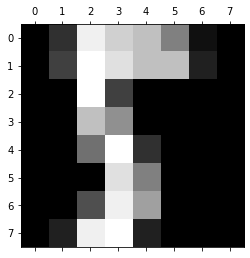

Clase de la imagen: 5


In [2]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digitos.images[230]) 
plt.show() 
print("Clase de la imagen: {}".format(digitos.target[230]))

Este conjunto de datos se puede usar de dos formas:

* Aprender un clasificador multiclase
* Observando la matriz de confusión del clasificador multiclase, elegir un par de dígitos que puedan tener algunas predicciones intercambiadas y aprender un clasificador binario para ese problema

Con los modelos finalmente aprendidos, mostrar con las imágenes del dígito, algún ejemplo que se clasifique bien y alguno que se clasifique mal. 

### Exploración preliminar del conjunto de datos

Con shape calculamos la dimensión del conjunto de datos. En este caso, la dimensión es 1797 x 64, es decir, tenemos una matriz de vectores, por cada fila, tenemos un vector de 64 columnas.

In [3]:
digitos.data.shape

(1797, 64)

digitos.data muestra la estructura de los datos

In [4]:
digitos.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

target_names contiene las clases en las que podemos clasificar los datos

In [5]:
digitos.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

digitos.target es el vector objetivo

In [6]:
digitos.target

array([0, 1, 2, ..., 8, 9, 8])

digitos.DESCR nos muestra con detalle las características del dataset, mostrando el número de instancias, atributos, creado, fecha de creacion, etc.

In [7]:
print(digitos.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Cargo los datos en las variables x e y

In [8]:
X_digitos, y_digitos = digitos.data, digitos.target

#### Separación de los datos en dos conjuntos de entrenamiento

Para separar los datos en dos conjuntos de entrenamiento, usaremos el train_split_test de scikit-learn.

El conjunto será separado en una proporción (75%-25%)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digitos,y_digitos,test_size=0.25,shuffle=False)

Como tenemos un modelo múltiple, podemos usar una clasficador lineal empleando el one vs all, o usar un Random Forest nos permite clasificar directamente el modelo

Utilizaremos Random Forest con GridSearchCV.

**Random Forest** es un clasificador múltiple que consiste en un gran número de arboles de decisión que operan como un conjunto. Cada árbol realiza una predición de una clase, de forma que la clase con más voto será la clase que predice nuestro modelo.

**GridSearchCV** nos permite elegir los parámetros que maximizará el rendimiento de nuestro entrenamiento, además, también usa **validación cruzada**, lo que nos generará diferentes conjuntos de entrenamiento.

La **validación cruzada** nos permite generar conjuntos de entrenamiento y de test de forma aleatoria. Divide el conjunto de datos en k partes (parámetro cv), en cada iteración coge una parte para el conjunto de test y el resto, como conjunto de entrenamiento.

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
from sklearn.ensemble import RandomForestClassifier
#Parámetros del Random Forest que usaremos con GridSearchCV para obtener el mejor modelo
n_estimators = [100, 300, 500]
max_depth = [5, 8, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5] 

param = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

rfc = RandomForestClassifier()

In [12]:
gsrfc = GridSearchCV(rfc, param, cv = 5, verbose = 1, 
                      n_jobs = -1)

In [13]:
gsrfc.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [14]:
print("Mejor clasificador encontrado: {}", gsrfc.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(gsrfc.score(X_test, y_test)))

Mejor clasificador encontrado: {} RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Evaluación sobre el conjunto de test: 0.92


Al ser un clasificador, obtenemos el accuracy, es decir, el porcentaje de acierto

<Figure size 432x288 with 0 Axes>

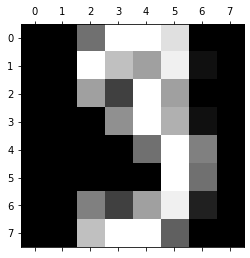

Clase de la imagen: 3
Clase predecida: [3]


In [15]:
plt.gray()
plt.matshow(X_test[0].reshape(8,8)) 
plt.show() 
print("Clase de la imagen: {}".format(y_test[0]))
print("Clase predecida: {}".format(gsrfc.predict(X_test[0].reshape(1,-1))))

A continuación obtendremos las métricas de nuestro modelo

### Matriz de confusión

La matriz de confusión nos proporciona cuántos aciertos tenemos por clase y que elementos han sido mal clasificados

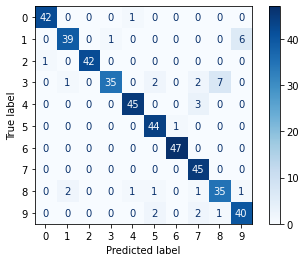

In [16]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#Creamos gráfica para representar la matriz de confusión
plot_confusion_matrix(gsrfc, X_test, y_test, digitos.target_names, cmap=plt.cm.Blues)
plt.show()

#La diagonal de la matriz nos muestra los aciertos que hemos obtenido para cada clase.
#Los elementos que están a 0 nos indica que hemos obtenido un acierto
#El resto de elementos que no están a 0, nos indica cuantos errores hemos obtenido para una clase,
#ademas podemos saber con que clase la están confundiendo

La **precisión** es una métrica adecuada para medir la proporción de positivos de entre los que se han predicho como positivos.

El **recall** mide la proporción de ejemplos que se han predicho positivos de entre todos los positivos.


In [17]:
from sklearn.metrics import classification_report
predicion = gsrfc.predict(X_test)
print(classification_report(y_test, predicion))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.93      0.85      0.89        46
           2       1.00      0.98      0.99        43
           3       0.97      0.74      0.84        47
           4       0.96      0.94      0.95        48
           5       0.90      0.98      0.94        45
           6       0.98      1.00      0.99        47
           7       0.85      1.00      0.92        45
           8       0.81      0.85      0.83        41
           9       0.85      0.89      0.87        45

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



Podemos observar que la clase 2, ha sido correctamente clasificada, en cambio las clases 8 y 9, ha sido clasificada con menor precisión

Observando la matriz de confusión, observamos que el clasificador está clasificando los "3" de forma errónea, ya que los clasifica como "8".

Vamos a crear un clasificador binario para clasificarlos

#### Preparamos los datos

In [18]:
X = []
y = []
#Guardamos en x el valor la clase y en i, la posición dentro de digitos.target
for x,i in zip(digitos.target,range(0,len(digitos.target))):
    if x==3 or x==8:
        #Si es 3 o 8, lo guardamos en la lista que usaremos para entrenar el modelo
        X.append(digitos.data[i])
        y.append(x)

Separamos el nuevo conjunto de entrenamiento

In [19]:
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X,y,test_size=0.25,shuffle=False)

En esta ocasión usaremos una **máquina de vectores soporte** para clasificar el nuevo modelo.

**Máquina de vectores soporte (Support Vector Machines)** permiten encontrar la forma óptima de clasificar entre varias clases. La clasificación óptima se realiza maximizando el margen de separación entre las clases. Los vectores que definen el borde de esta separación son los vectores de soporte.

In [20]:
from sklearn.svm import LinearSVC

In [21]:
svc = LinearSVC()

Estos son los parámetros que usaremos en GridSearchCV para obtener el SVC que mejor entrene el modelo

In [22]:
param_svc = dict(penalty = ['l1','l2'], 
                 loss = ['hinge','square_hinge'], 
                 C = [0, 0.5, 1, 1.5])

In [23]:
gssvc = GridSearchCV(svc, param_svc, cv = 5, verbose = 1, 
                      n_jobs = -1)

Entrenamos el modelo

In [24]:
gssvc.fit(X_train_b,y_train_b)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0, 0.5, 1, 1.5],
                         'loss': ['hinge', 'square_hinge'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [25]:
print("Evaluación sobre el conjunto de test: {:.2f}".format(gssvc.score(X_test_b, y_test_b)))

Evaluación sobre el conjunto de test: 0.93


## 2. Críticas de cine en IMDB

En este apartado, los datos serán críticas de películas en la web IMDB (Internet Movie Database). Son críticas que ya vienen con la etiqueta "pos" o "neg", de acuerdo a la puntuación que acompaña a la crítica (positiva, 7 o más; negativa 4 o menos). El objetivo es ser capaz de declarar como positiva o negativa una crítica (por supuesto, sin saber la puntuación que la acompaña).

Los datos están disponibles en http://ai.stanford.edu/~amaas/data/sentiment/

**Importante: Una vez descomprimido, eliminare la carpeta `train/unsup`, que no usaremos.**

Para cargarlo en sklearn usar la utilidad `load_files`:  

In [26]:
from sklearn.datasets import load_files

reviews_train = load_files("aclImdb/train",encoding='utf-8')
text_train, y_train = reviews_train.data, reviews_train.target

reviews_test = load_files("aclImdb/test",encoding='utf-8')
text_test, y_test = reviews_test.data, reviews_test.target

Quitamos algunas marcas en HTML, para "limpiar" los textos.

In [27]:
text_train = [doc.replace("<br />", " ") for doc in text_train]
text_test = [doc.replace("<br />", " ") for doc in text_test]

Para poder aplicar los clasificadores de Scikit Learn, hemos de vectorizar los textos. En scikitlearn se pueden elegir varias formas de vectorizar:

* **CountVectorizer**, modo binario (sólo se anota si un término ocurre o no)
* **CountVectorizer**, contando ocurrencias
* **TfIdfVectorizer**, vectorizando con TfIdf

El uso de estos vectorizadores se puede comprender a partir de lo visto en el tema de Procesamiento de Lenguaje Natural, y del manual de Scikit Learn. En particular **es importante el uso de los parámetros stop_words y min_df** para simplificar a vectorización. Una vez entendido y explorado su uso, elegir la mejor combinación de vectorizador y de clasificador, para este conjunto de datos. 

También mostrar la predicción que se realiza sobre algunas críticas concretas del conjunto de test. 

### CountVectorizer

#### Modo Binario

El CountVectorizer genera un vector que representa en cada posición con 0 o 1 si la palabra aparece o no en el texto

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
#stop_words: Elimina las palabras que son irrelevantes en el corpus
#min_df: El modelo ignora las palabras que aparecen con la frecuencia inferior indicada en este parámetro
#ngram_range: Representa las palabras en bigrams
bcv = CountVectorizer(stop_words='english',min_df=2,binary=True,ngram_range=(1,2))
bcv.fit(text_train)
X_train_bcv = bcv.transform(text_train)
X_test_bcv = bcv.transform(text_test)

Vocabulario generado por CountVectorizer

In [29]:
bcv.vocabulary_

{'zero': 308056,
 'day': 59913,
 'leads': 150557,
 'think': 271685,
 'boys': 30332,
 'young': 307396,
 'men': 173303,
 'did': 65407,
 'commit': 49696,
 'mutual': 185619,
 'suicide': 263142,
 'slaughtering': 249022,
 'classmates': 45653,
 'captures': 35768,
 'bizarre': 26664,
 'mode': 177199,
 'humans': 129697,
 'decided': 61649,
 'withdraw': 300359,
 'common': 49747,
 'civility': 45043,
 'order': 194319,
 'define': 62268,
 'world': 303346,
 'coupled': 54756,
 'destruction': 64260,
 'perfect': 200528,
 'movie': 179634,
 'given': 110473,
 'money': 177922,
 'time': 274182,
 'filmmaker': 98421,
 'actors': 5629,
 'remarkable': 223718,
 'product': 213171,
 'terms': 269429,
 'explaining': 86773,
 'motives': 179345,
 'actions': 5232,
 'murderers': 184838,
 'better': 24474,
 'elephant': 78429,
 'film': 94677,
 'gets': 108713,
 'rationalistic': 218134,
 'skin': 248745,
 'far': 90930,
 'likely': 156904,
 'flawed': 100971,
 'honest': 127071,
 'terrible': 269497,
 'honesty': 127179,
 'zero day': 30

Palabras eliminadas por el parámetro stop_words

In [30]:
bcv.stop_words_

{'hills attacked',
 'ghost wrongly',
 'notice washed',
 'tonight speaks',
 'shots mira',
 'ageing comedians',
 'hint maybe',
 'permitting react',
 'decent knows',
 'picked added',
 'fan end',
 'fu manual',
 'mangled scratchy',
 'join wresting',
 'public preview',
 'synonymous unfunny',
 'suddenly university',
 'change man',
 'interrupts asserting',
 'absence red',
 'branagh olivier',
 'mean fake',
 'tracks perpetrators',
 'presence dumb',
 'stands tells',
 'american obvious',
 'halaqah',
 'various kinds',
 'really relatively',
 'showy erotic',
 'don hang',
 'bodily humor',
 'exactly crank',
 'kid hoss',
 'thanks dialogue',
 'kun good',
 'snafu incorrectly',
 'taken homes',
 'depressive life',
 'realistic pushing',
 'run armed',
 'freakish way',
 'really ironic',
 'lead recommend',
 'oscar worst',
 'cruise emmanuelle',
 'personal everyman',
 'productions watchable',
 'late speaking',
 'hath gods',
 'smacked genitals',
 'skin virus',
 'augh parents',
 'aside anecdote',
 'strange despite'

Para clasificar las palabras del documento, utilizaremos el **Naive Bayes** y **k-NN**

Entrenamos el modelo CountVectorizer en modo binario con **Naive Bayes**, sacaremos los mejores parámetros con GridSearchCV

In [31]:
from sklearn.naive_bayes import MultinomialNB

alpha = [0,0.5,1]
param = dict(alpha = alpha)

In [32]:
nb = MultinomialNB()

Creamos el modelo con GridSearchCV usando los parámetros elegidos anteriormente

In [33]:
gnbb = GridSearchCV(nb, param, cv = 5, verbose = 1, 
                      n_jobs = -1)

Entrenamos el modelo con los parámetros anteriores

In [34]:
gnbb.fit(X_train_bcv,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1, param_grid={'alpha': [0, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [35]:
print("Rendimiento sobre el conjunto de test: {:.2f}".format(gnbb.score(X_test_bcv,y_test)))

Rendimiento sobre el conjunto de test: 0.86


Predecimos el valor de un elemento del modelo

In [63]:
print("La clase predicha es {}".format(gnbb.predict(X_test_bcv[2])))

L clase predicha es [1]


Entrenamos el modelo CountVectorizer en modo binario con **k-NN**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

In [38]:
knn.fit(X_train_bcv,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [39]:
print("Rendimiento sobre el conjunto de test: {:.2f}".format(knn.score(X_test_bcv,y_test)))

Rendimiento sobre el conjunto de test: 0.50


#### Ocurrencias

Es similar al CountVectorizer en modo binario, salvo que en este, cada posición del vector, representa el número de veces que aparece la palabra en el corpus. Para ello, <u>el parámetro binary debe ser <b>False</b></u>

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english',min_df=2,ngram_range=(1,2))
cv.fit(text_train)
X_train_cv = cv.transform(text_train)
X_test_cv = cv.transform(text_test)

Vocabulario creado por el modelo

In [41]:
cv.vocabulary_

{'zero': 308056,
 'day': 59913,
 'leads': 150557,
 'think': 271685,
 'boys': 30332,
 'young': 307396,
 'men': 173303,
 'did': 65407,
 'commit': 49696,
 'mutual': 185619,
 'suicide': 263142,
 'slaughtering': 249022,
 'classmates': 45653,
 'captures': 35768,
 'bizarre': 26664,
 'mode': 177199,
 'humans': 129697,
 'decided': 61649,
 'withdraw': 300359,
 'common': 49747,
 'civility': 45043,
 'order': 194319,
 'define': 62268,
 'world': 303346,
 'coupled': 54756,
 'destruction': 64260,
 'perfect': 200528,
 'movie': 179634,
 'given': 110473,
 'money': 177922,
 'time': 274182,
 'filmmaker': 98421,
 'actors': 5629,
 'remarkable': 223718,
 'product': 213171,
 'terms': 269429,
 'explaining': 86773,
 'motives': 179345,
 'actions': 5232,
 'murderers': 184838,
 'better': 24474,
 'elephant': 78429,
 'film': 94677,
 'gets': 108713,
 'rationalistic': 218134,
 'skin': 248745,
 'far': 90930,
 'likely': 156904,
 'flawed': 100971,
 'honest': 127071,
 'terrible': 269497,
 'honesty': 127179,
 'zero day': 30

Palabras eliminadas por el parámetro stop_words

In [42]:
cv.stop_words_

{'hills attacked',
 'ghost wrongly',
 'notice washed',
 'tonight speaks',
 'shots mira',
 'ageing comedians',
 'hint maybe',
 'permitting react',
 'decent knows',
 'picked added',
 'fan end',
 'fu manual',
 'mangled scratchy',
 'join wresting',
 'public preview',
 'synonymous unfunny',
 'suddenly university',
 'change man',
 'interrupts asserting',
 'absence red',
 'branagh olivier',
 'mean fake',
 'tracks perpetrators',
 'presence dumb',
 'stands tells',
 'american obvious',
 'halaqah',
 'various kinds',
 'really relatively',
 'showy erotic',
 'don hang',
 'bodily humor',
 'exactly crank',
 'kid hoss',
 'thanks dialogue',
 'kun good',
 'snafu incorrectly',
 'taken homes',
 'depressive life',
 'realistic pushing',
 'run armed',
 'freakish way',
 'really ironic',
 'lead recommend',
 'oscar worst',
 'cruise emmanuelle',
 'personal everyman',
 'productions watchable',
 'late speaking',
 'hath gods',
 'smacked genitals',
 'skin virus',
 'augh parents',
 'aside anecdote',
 'strange despite'

In [43]:
gnbo = GridSearchCV(nb, param, cv = 5, verbose = 1, 
                      n_jobs = -1)

In [44]:
gnbo.fit(X_train_cv,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1, param_grid={'alpha': [0, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [45]:
print("Rendimiento sobre el conjunto de test: {:.2f}".format(gnbo.score(X_test_cv,y_test)))

Rendimiento sobre el conjunto de test: 0.84


In [65]:
print("La clase predicha es: {}".format(gnbb.predict(X_test_cv[2])))

La clase predicha es: [1]


Entrenamos el modelo CountVectorizer con **k-NN**

In [46]:
knn.fit(X_train_cv,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [47]:
print("Rendimiento sobre el conjunto de test: {:.2f}".format(knn.score(X_test_cv,y_test)))

Rendimiento sobre el conjunto de test: 0.55


### Tfldf

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tdidf = TfidfVectorizer(stop_words='english',min_df=2,binary=True,ngram_range=(1,2))
tdidf.fit(text_train)
X_train_tdidf = tdidf.transform(text_train)
X_test_tdidf = tdidf.transform(text_test)

In [49]:
tdidf.vocabulary_

{'zero': 308056,
 'day': 59913,
 'leads': 150557,
 'think': 271685,
 'boys': 30332,
 'young': 307396,
 'men': 173303,
 'did': 65407,
 'commit': 49696,
 'mutual': 185619,
 'suicide': 263142,
 'slaughtering': 249022,
 'classmates': 45653,
 'captures': 35768,
 'bizarre': 26664,
 'mode': 177199,
 'humans': 129697,
 'decided': 61649,
 'withdraw': 300359,
 'common': 49747,
 'civility': 45043,
 'order': 194319,
 'define': 62268,
 'world': 303346,
 'coupled': 54756,
 'destruction': 64260,
 'perfect': 200528,
 'movie': 179634,
 'given': 110473,
 'money': 177922,
 'time': 274182,
 'filmmaker': 98421,
 'actors': 5629,
 'remarkable': 223718,
 'product': 213171,
 'terms': 269429,
 'explaining': 86773,
 'motives': 179345,
 'actions': 5232,
 'murderers': 184838,
 'better': 24474,
 'elephant': 78429,
 'film': 94677,
 'gets': 108713,
 'rationalistic': 218134,
 'skin': 248745,
 'far': 90930,
 'likely': 156904,
 'flawed': 100971,
 'honest': 127071,
 'terrible': 269497,
 'honesty': 127179,
 'zero day': 30

In [50]:
tdidf.stop_words_

{'hills attacked',
 'ghost wrongly',
 'notice washed',
 'tonight speaks',
 'shots mira',
 'ageing comedians',
 'hint maybe',
 'permitting react',
 'decent knows',
 'picked added',
 'fan end',
 'fu manual',
 'mangled scratchy',
 'join wresting',
 'public preview',
 'synonymous unfunny',
 'suddenly university',
 'change man',
 'interrupts asserting',
 'absence red',
 'branagh olivier',
 'mean fake',
 'tracks perpetrators',
 'presence dumb',
 'stands tells',
 'american obvious',
 'halaqah',
 'various kinds',
 'really relatively',
 'showy erotic',
 'don hang',
 'bodily humor',
 'exactly crank',
 'kid hoss',
 'thanks dialogue',
 'kun good',
 'snafu incorrectly',
 'taken homes',
 'depressive life',
 'realistic pushing',
 'run armed',
 'freakish way',
 'really ironic',
 'lead recommend',
 'oscar worst',
 'cruise emmanuelle',
 'personal everyman',
 'productions watchable',
 'late speaking',
 'hath gods',
 'smacked genitals',
 'skin virus',
 'augh parents',
 'aside anecdote',
 'strange despite'

In [66]:
gnbidf = GridSearchCV(nb, param, cv = 5, verbose = 1, 
                      n_jobs = -1)

In [67]:
gnbidf.fit(X_train_tdidf,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1, param_grid={'alpha': [0, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [68]:
print("Rendimiento sobre el conjunto de test: {:.2f}".format(gnbidf.score(X_test_tdidf,y_test)))

Rendimiento sobre el conjunto de test: 0.86


In [69]:
print("La clase predicha es: {}".format(gnbb.predict(X_test_tdidf[2])))

La clase predicha es: [1]


Entrenamos el modelo **TdfidfVectorizer** con **k-NN**, sacaremos los mejores parámetros con GridSearchCV

In [70]:
knn.fit(X_train_tdidf,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
print("Rendimiento sobre el conjunto de test: {:.2f}".format(knn.score(X_test_tdidf,y_test)))

## Conclusión

El modelo que da mejor resultados son el modelo usando Tdidf y el CountVectorize en modo binario con una precisión del 86%.

## 3. Un tercer conjunto de datos adicional

Este apartado es opcional.

Se pide estudiar un tercer conjunto de datos (clasificación o regresión), obtenido a partir de algún repositorio. Por ejemplo, uno muy popular es el de UCI: https://archive.ics.uci.edu/ml/index.php

Damos un par de sugerencias, pero solo a título orientativo:

* Conjunto de datos de dermatología: https://archive.ics.uci.edu/ml/datasets/dermatology (porblema de clasificación)
* Calidad de vino: https://archive.ics.uci.edu/ml/datasets/wine+quality (regresión) 

Nótese que en este caso, esto implicaría previamente cargar de manera adecuada los datos (posiblemente con algún preprocesado).

In [ ]:
#Importamos el datasets de la calidad del vino
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression

Cargamos los datos en la variable wine

In [ ]:
X,y = load_wine(return_X_y=True)

Describimos el dataset

In [ ]:
wine.DESCR

target_names contiene las clases en las que podemos clasificar los datos

In [ ]:
wine.feature_names

Con shape calculamos la dimensión del conjunto de datos. En este caso, la dimensión es 178 x 13, es decir, tenemos una matriz de vectores, por cada fila, tenemos un vector de 13 columnas.

In [ ]:
wine.data.shape

wine.data muestra la estructura de los datos

In [ ]:
wine.data

wine.target es el vector objetivo

In [ ]:
wine.target

Los datos son muy dispares, por lo que los vamos normalizar los datos

In [ ]:
#Importamos el normalizador
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Creamos el normalizador
scaler = MinMaxScaler()

Normalizamos los datos

In [ ]:
scaler.fit(wine.data)

In [ ]:
X_norm = scaler.transform(X)
X_norm

Una vez hemos normalizado los datos, ya podemos entrenar el modelo

Vamos a predecir la calidad del vino, para ello vamos a utilizar una **Regresión Lineal**.

Separamos el conjunto de entrenamiento y el de test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, wine.target,test_size=0.25,random_state=0)

In [ ]:
lr = LinearRegression()

Entrenamos el modelo

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(lr.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(lr.score(X_test, y_test)))

Mostramos los datos predichos

In [ ]:
y_pred = lr.predict(X_test)

 Calculamos el error cuadrático

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test, y_pred)

Coeficiente de determinación

In [ ]:
r2_score(y_test, y_pred)